In [ ]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preview'] = True
plt.rc('font', family='serif', serif=['Times'])

In [ ]:
cm = plt.get_cmap('Paired') 
colors = [cm.colors[-3], cm.colors[-4]]

In [8]:
def draw_pie(dist, xpos, ypos, size, ax=None, colors=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,8))

    # for incremental pie slices
    cumsum = np.cumsum(dist)
    size *= cumsum[-1]
    cumsum = cumsum/ cumsum[-1]
    pie = [0] + cumsum.tolist()

    markers = []
    for ix, (r1, r2) in enumerate(zip(pie[:-1], pie[1:])):
        angles = np.linspace(2 * np.pi * r1, 2 * np.pi * r2)
        x = [0] + np.cos(angles).tolist()
        y = [0] + np.sin(angles).tolist()

        xy = np.column_stack([x, y])
        if colors:
            markers.append({'marker': xy, 's': size, 'facecolor': colors[ix], 'edgecolor': colors[ix], 'alpha': 0.6})
        else:
            markers.append({'marker': xy, 's': size})

    # scatter each of the pie pieces to create pies
    for marker in markers:
        ax.scatter([xpos], [ypos], **marker)

    return ax

## Sort by date

In [9]:
# [in-domain, out-of-domain]
model2sizes = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': [0, 31],
    '$\\mathrm{\\textsc{LXMERT}}$': [92, 0],
    '$\\mathrm{\\textsc{VL-BERT}_{BASE}}$': [0, 33],
    '$\\mathrm{\\textsc{VisualBERT}}$': [6, 0],
    '$\\mathrm{\\textsc{UNITER}_{BASE}}$': [56, 40],
    '$\\mathrm{\\textsc{Unified-VLP}}$': [0, 30],
    '$\\mathrm{\\textsc{Oscar}_{BASE}}$': [27, 38],
    '$\\mathrm{\\textsc{ERNIE-ViL}_{BASE}}$': [0, 38],
}

model2vqa = {
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 71.82,
    '$\\mathrm{\\textsc{LXMERT}}$': 72.50,
    '$\\mathrm{\\textsc{VL-BERT}_{BASE}}$': 71.16,
    '$\\mathrm{\\textsc{VisualBERT}}$': 70.80,
    '$\\mathrm{\\textsc{UNITER}_{BASE}}$': 72.27,
    '$\\mathrm{\\textsc{Unified-VLP}}$': 70.50,
    '$\\mathrm{\\textsc{Oscar}_{BASE}}$': 73.16,
    '$\\mathrm{\\textsc{ERNIE-ViL}_{BASE}}$': 72.62,
}

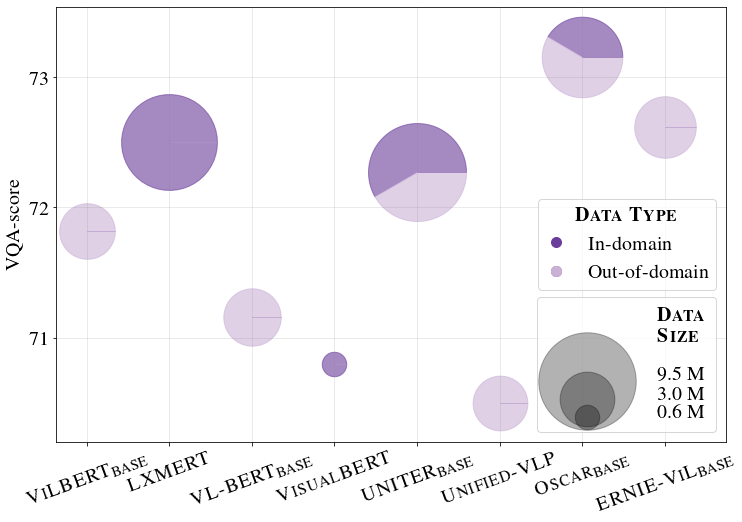

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

size = 100
for ix, (name, yval) in enumerate(model2vqa.items()):
    draw_pie(model2sizes[name], ix, yval, size, ax=ax, colors=colors)

ax.set_xticks([x for x in range(len(model2vqa))])
ax.set_xticklabels(model2vqa.keys(), fontsize=20, rotation=20)
ax.tick_params(axis="y", labelsize=20)
ax.set_ylabel("VQA-score", fontsize=20)
plt.grid(color='gray', alpha=0.2)

# Legends
indomain, = plt.plot([], "o", color=colors[0], markersize=10)
outdomain, = plt.plot([], "o", color=colors[1], markersize=10)
leg1 = ax.legend([indomain, (indomain, outdomain)], ['In-domain', 'Out-of-domain'], fontsize=20, 
                 loc='upper right', bbox_to_anchor=(1, 0.58), handlelength=1, handletextpad=1.1,
                 title='$\\textbf{\\textsc{Data Type}}$', title_fontsize=20,)
ax.scatter([], [], c='k', alpha=0.3, s=0, label='$\\textbf{\\textsc{Data}}$\n$\\textbf{\\textsc{Size}}$\n')
for area in [0.6, 3.0, 9.5][::-1]:
    ax.scatter([], [], c='k', alpha=0.3, s=size*10*area, label=str(area) + ' M')
leg2 = ax.legend(scatterpoints=1, fontsize=20, ncol=1, scatteryoffsets=[0.0], labelspacing=0.0,
                 loc='lower right', handlelength=4, borderpad=.5, handletextpad=1.5)

ax.add_artist(leg1)

from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.savefig('papers.pdf', bbox_inches='tight')

## Sort by data size

In [14]:
# [in-domain, out-of-domain]
model2sizes = {
    '$\\mathrm{\\textsc{VisualBERT}}$': [6, 0],
    '$\\mathrm{\\textsc{Unified-VLP}}$': [0, 30],
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': [0, 31],
    '$\\mathrm{\\textsc{VL-BERT}_{BASE}}$': [0, 33],
        '$\\mathrm{\\textsc{ERNIE-ViL}_{BASE}}$': [0, 38],
        '$\\mathrm{\\textsc{Oscar}_{BASE}}$': [27, 38],
    '$\\mathrm{\\textsc{LXMERT}}$': [92, 0],
    '$\\mathrm{\\textsc{UNITER}_{BASE}}$': [56, 40],
}

model2vqa = {
    '$\\mathrm{\\textsc{VisualBERT}}$': 70.80,
    '$\\mathrm{\\textsc{Unified-VLP}}$': 70.50,
    '$\\mathrm{\\textsc{ViLBERT}_{BASE}}$': 71.82,
    '$\\mathrm{\\textsc{VL-BERT}_{BASE}}$': 71.16,
    '$\\mathrm{\\textsc{ERNIE-ViL}_{BASE}}$': 72.62,
    '$\\mathrm{\\textsc{Oscar}_{BASE}}$': 73.16,
    '$\\mathrm{\\textsc{LXMERT}}$': 72.50,
    '$\\mathrm{\\textsc{UNITER}_{BASE}}$': 72.27,

}

/Users/plz563/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: 
The make_dvi_preview function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


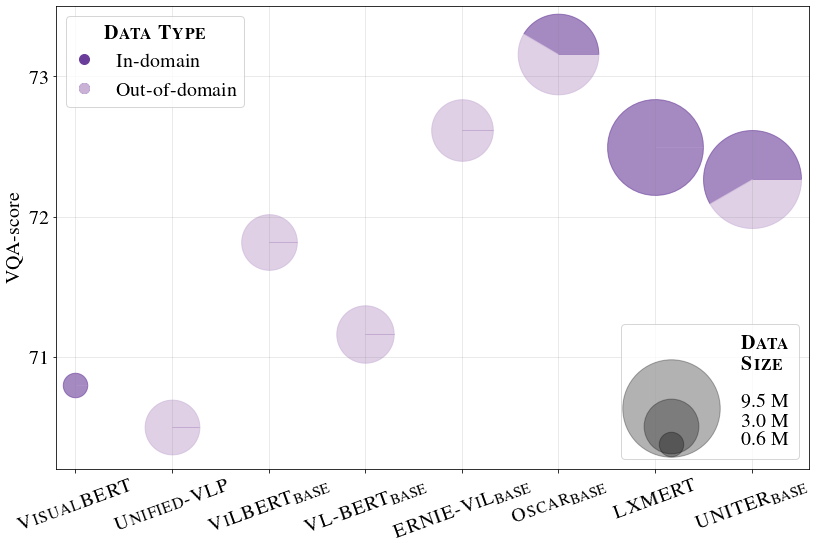

In [44]:
fig, ax = plt.subplots(figsize=(13.5,8.5))

size = 100
for ix, (name, yval) in enumerate(model2vqa.items()):
    draw_pie(model2sizes[name], ix, yval, size, ax=ax, colors=colors)

ax.set_xticks([x for x in range(len(model2vqa))])
ax.set_xticklabels(model2vqa.keys(), fontsize=20, rotation=20)
ax.tick_params(axis="y", labelsize=20)
ax.set_ylabel("VQA-score", fontsize=20)
plt.grid(color='gray', alpha=0.2)

# Legends
indomain, = plt.plot([], "o", color=colors[0], markersize=10)
outdomain, = plt.plot([], "o", color=colors[1], markersize=10)
leg1 = ax.legend([indomain, (indomain, outdomain)], ['In-domain', 'Out-of-domain'], fontsize=20, 
                 loc='upper left', bbox_to_anchor=(0, 1), handlelength=1, handletextpad=1.1,
                 title='$\\textbf{\\textsc{Data Type}}$', title_fontsize=20,)
ax.scatter([], [], c='k', alpha=0.3, s=0, label='$\\textbf{\\textsc{Data}}$\n$\\textbf{\\textsc{Size}}$\n')
for area in [0.6, 3.0, 9.5][::-1]:
    ax.scatter([], [], c='k', alpha=0.3, s=size*10*area, label=str(area) + ' M')
leg2 = ax.legend(scatterpoints=1, fontsize=20, ncol=1, scatteryoffsets=[0.0], labelspacing=0.0,
                 loc='lower right', handlelength=4, borderpad=.5, handletextpad=1.5)

ax.add_artist(leg1)

plt.ylim(70.2, 73.5)
plt.xlim(-.2, 7.6)

from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.savefig('papers2.pdf', bbox_inches='tight')